In [2]:
import xarray as xr
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle


# Open the netCDF file using xarray
ds = xr.open_dataset('temporal_input/ocean-3d-u-1-daily-mean-ym_1999_01.nc')
# Extract the latitude and longitude arrays using numpy
lat = np.array(ds['yu_ocean'])
lon = np.array(ds['xu_ocean'])
# get the minimum value for longitude
# Extract one time step and one depth of the u array using isel
u = ds['u'].isel(time=0, st_ocean=0)
print(ds['u'])


<xarray.DataArray 'u' (time: 31, st_ocean: 75, yu_ocean: 2700, xu_ocean: 3600)>
[22599000000 values with dtype=float32]
Coordinates:
  * xu_ocean  (xu_ocean) float64 -279.9 -279.8 -279.7 -279.6 ... 79.8 79.9 80.0
  * yu_ocean  (yu_ocean) float64 -81.09 -81.05 -81.0 -80.96 ... 89.92 89.96 90.0
  * st_ocean  (st_ocean) float64 0.5413 1.681 2.94 ... 5.511e+03 5.709e+03
  * time      (time) datetime64[ns] 1999-01-01T12:00:00 ... 1999-01-31T12:00:00
Attributes:
    long_name:      i-current
    units:          m/sec
    valid_range:    [-10.  10.]
    cell_methods:   time: mean
    time_avg_info:  average_T1,average_T2,average_DT
    standard_name:  sea_water_x_velocity


# Print the model domain

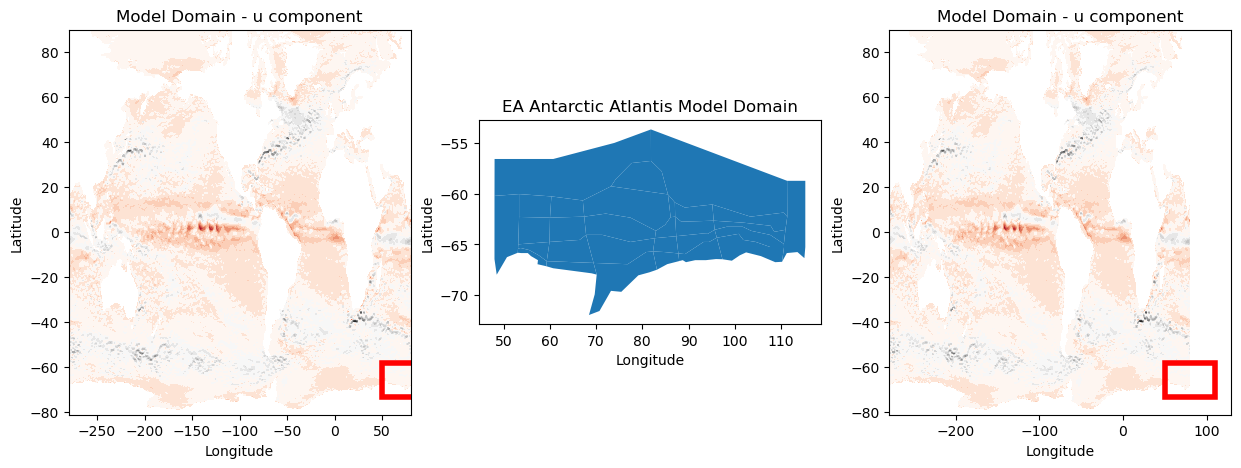

In [7]:
df = gpd.read_file('/home/por07g/Documents/Projects/Supervision/Ilaria/Polygons/EA29_2509/EAA29_cleaned_v2.shp')
# Define the new projection using the EPSG code
new_crs = 'EPSG:4326'
# Change the projection of the coordinates using to_crs
df = df.to_crs(new_crs)
## new long from -180 to 180 degrees East
new_lon = np.where(lon > 180, lon - 360, lon)
# Get the sorted indices of the new_lon array
sorted_indices = np.argsort(new_lon)
# Create a new array for the sorted longitudes and the corresponding u values
new_lon_sorted = new_lon[sorted_indices]
u_sorted = u[:, sorted_indices]

# Create a figure with two subplots
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(15, 5))
# Plot the u component on the first subplot
lon_mesh, lat_mesh = np.meshgrid(lon, lat)
new_lon_mesh, new_lat_mesh = np.meshgrid(new_lon, lat)
ax1.contourf(lon_mesh, lat_mesh, u, 20, cmap='RdGy')
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')
ax1.set_title('Model Domain - u component')

# Plot the shapefile on the second subplot
df.plot(ax=ax2)
ax2.set_xlabel('Longitude')
ax2.set_ylabel('Latitude')
ax2.set_title('EA Antarctic Atlantis Model Domain')

ax3.contourf(new_lon_mesh, new_lat_mesh, u_sorted, 20, cmap='RdGy')
ax3.set_xlabel('Longitude')
ax3.set_ylabel('Latitude')
ax3.set_title('Model Domain - u component')

# Draw a square on top of the second subplot
rect = Rectangle((50, -73), 60, 15, linewidth=4, edgecolor='r', facecolor='none')
rect2 = Rectangle((50, -73), 60, 15, linewidth=4, edgecolor='r', facecolor='none')

ax1.add_patch(rect)
ax3.add_patch(rect2)




# Show the plot


plt.show()


## Get the real domain of the model

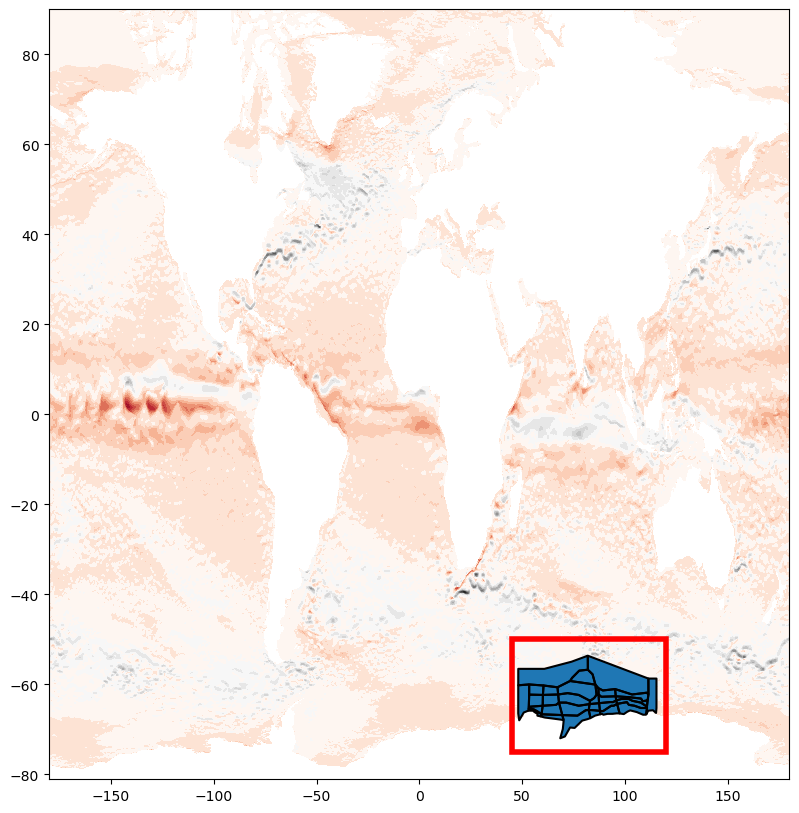

Min Longitude: 48.05000000029991
Min Latitude: -71.96990376210255
Max Longitude: 115.25294536115659
Max Latitude: -53.63183346766243


In [27]:
# change the longitude of the shapefile to be between 0 and 360
temp_lon = np.where(lon < 180, lon + 360, lon)
new_lon = np.where(temp_lon > 180, temp_lon - 360, temp_lon)
# Get the sorted indices of the new_lon array
sorted_indices = np.argsort(new_lon)

# Create a new array for the sorted longitudes and the corresponding u values
new_lon_sorted = new_lon[sorted_indices]
u_sorted = u[:, sorted_indices]
#u_sorted = u[:, sorted_indices]
# new mesh
new_lon_mesh, lat_mesh = np.meshgrid(new_lon_sorted, lat)

# Create a figure with the new projection
fig, ax = plt.subplots(figsize=(10, 10))
# Plot the new u component
ax.contourf(new_lon_mesh, lat_mesh, u_sorted, 20, cmap='RdGy')
# Plot the shapefile
df.plot(ax=ax)

# Draw a square on top of the second subplot
rect = Rectangle((45, -75), 75, 25, linewidth=4, edgecolor='r', facecolor='none')
ax.add_patch(rect)


# Extract the boundaries
boundaries = df.boundary

# Plot the points
#fig, ax = plt.subplots()
boundaries.plot(ax=ax, color='black')
plt.show()
minx, miny, maxx, maxy = df.total_bounds
print('Min Longitude:', minx)
print('Min Latitude:', miny)
print('Max Longitude:', maxx)
print('Max Latitude:', maxy)

/home/por07g/miniconda3/envs/GBR_env/lib/python3.9/site-packages/matplotlib/contour.py:1480: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/home/por07g/miniconda3/envs/GBR_env/lib/python3.9/site-packages/matplotlib/contour.py:1481: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())


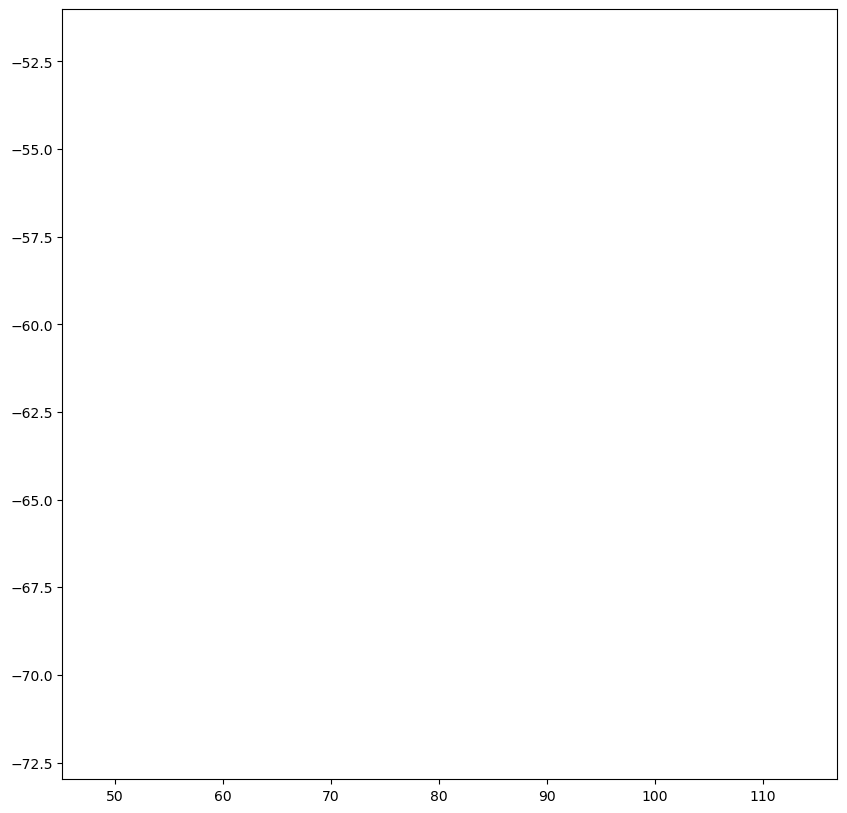

In [7]:
## getting new file after using the netcdf sample code:
# Open the netCDF file using xarray
ds = xr.open_dataset('new_u.nc')
#print(ds)
# # Extract the latitude and longitude arrays using numpy
lat = np.array(ds['yu_ocean'])
lon = np.array(ds['xu_ocean'])
# # get the minimum value for longitude
# # Extract one time step and one depth of the u array using isel
u = ds['u'].isel(time=0, st_ocean=0)
#print(ds['u'])

lon_mesh, lat_mesh = np.meshgrid(lon, lat)

# Create a figure with the new projection
fig, ax = plt.subplots(figsize=(10, 10))
# Plot the new u component
ax.contourf(lon_mesh, lat_mesh, u, 20, cmap='RdGy')
